### Chandra Deep Field Redshift vs edff Redshift

This notebook will plot the redshift of matched objects from the chandra deep field and the edff dataset in order to assess the accuracy of LYR matches

In [82]:
import sys
sys.path.append("./utils")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm
from astropy.io import fits

from data_loader import DataLoader
from config_loader import ConfigLoader

In [83]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

edff_color = '#e46868'
erosita_color = '#3d7cdc'
cdfs_color = '#6ead50'

plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Verdana']
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelpad'] = 20
plt.rcParams['axes.titlepad'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['axes.labelsize'] = 20
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['legend.fontsize'] = 16


config_path = "/Users/admin/Documents/GitHub/Matched-Catalog-Analysis/src/configs/config.yaml"

config = ConfigLoader(config_path)
data = DataLoader(verbose=0)

merged_catalog_edff_cdfs_path = config.EDFF_CDFS_PATH
lyr_output_edff_cdfs_path = "/Users/admin/Documents/GitHub/Matched-Catalog-Analysis/src/data_lyr/output/LR_edff_cdfs.txt"


In [84]:
matched_catalog_edff_cdfs = np.genfromtxt(lyr_output_edff_cdfs_path)

matched_catalog_edff_cdfs = pd.DataFrame(
    matched_catalog_edff_cdfs,
    columns=[
        "OutID",
        "RAout",
        "DECout",
        "mag_out",
        "InID",
        "RAin",
        "DECin",
        "mag_in",
        "r",
        "f(r)",
        "df",
        "f(df)",
        "q(m)",
        "n(m)",
        "LR",
        "Rel",
        "flag"
    ]
)

In [85]:
print(len(matched_catalog_edff_cdfs))
matched_catalog_edff_cdfs.sort_values(by='OutID').reset_index(drop=True).head(10)

2794


,OutID,RAout,DECout,mag_out,InID,RAin,DECin,mag_in,r,f(r),df,f(df),q(m),n(m),LR,Rel,flag
0,0.0,52.899178,-27.859588,0.0,458725.0,52.899829,-27.860406,27.0068,3.765,1.017000e-53,0.0,1.0,0.2136,0.003475,6.251000e-52,0.000,0.0
1,0.0,52.899178,-27.859588,0.0,458822.0,52.899085,-27.859726,23.3823,0.600,1.213000e-01,0.0,1.0,0.1665,0.001398,1.445000e+01,0.997,1.0
2,0.0,52.899178,-27.859588,0.0,458955.0,52.899275,-27.858235,26.9347,4.883,3.663000e-90,0.0,1.0,0.2172,0.003512,2.266000e-88,0.000,0.0
3,0.0,52.899178,-27.859588,0.0,458957.0,52.899675,-27.858643,24.8925,3.842,6.103000e-56,0.0,1.0,0.2375,0.002898,5.001000e-54,0.000,0.0
4,1.0,52.911023,-27.892965,0.0,456375.0,52.911016,-27.892986,23.8062,0.079,2.617000e+00,0.0,1.0,0.1899,0.001798,2.764000e+02,1.000,1.0
5,1.0,52.911023,-27.892965,0.0,456444.0,52.911156,-27.891864,25.8711,3.991,2.551000e-60,0.0,1.0,0.2491,0.003578,1.776000e-58,0.000,0.0
6,2.0,52.917119,-27.796253,0.0,432520.0,52.916637,-27.796247,24.6168,1.736,1.216000e-11,0.0,1.0,0.2280,0.002629,1.055000e-09,0.000,0.0
7,2.0,52.917119,-27.796253,0.0,432521.0,52.917198,-27.796322,22.5255,0.376,8.122000e-01,0.0,1.0,0.1191,0.000758,1.276000e+02,1.000,1.0
8,2.0,52.917119,-27.796253,0.0,432522.0,52.917377,-27.796995,23.9628,2.829,1.864000e-30,0.0,1.0,0.1981,0.001955,1.889000e-28,0.000,0.0
9,3.0,52.919726,-27.773984,0.0,434307.0,52.919589,-27.772659,24.6304,4.796,5.273000e-87,0.0,1.0,0.2285,0.002642,4.561000e-85,0.000,0.0


In [86]:
merged_catalog_edff_cdfs = pd.read_csv(merged_catalog_edff_cdfs_path)
merged_catalog_edff_cdfs.head(10)

,OutID,InID,Rel,LR,flag,ID,ALPHA_J2000,DELTA_J2000,X_MODEL,Y_MODEL,ERRX_MODEL,ERRY_MODEL,ALPHA_DETECTION,DELTA_DETECTION,FARMER_ID,GROUP_ID,N_GROUP,MODEL_FLAG,SOLUTION_MODEL,EBV_MW,CFHT_u_FLUX,CFHT_u_FLUXERR,CFHT_u_MAG,CFHT_u_MAGERR,CFHT_u_CHISQ,CFHT_u_DRIFT,CFHT_u_VALID,HSC_g_FLUX,HSC_g_FLUXERR,HSC_g_MAG,HSC_g_MAGERR,HSC_g_CHISQ,HSC_g_DRIFT,HSC_g_VALID,HSC_r_FLUX,HSC_r_FLUXERR,HSC_r_MAG,HSC_r_MAGERR,HSC_r_CHISQ,HSC_r_DRIFT,HSC_r_VALID,HSC_i_FLUX,HSC_i_FLUXERR,HSC_i_MAG,HSC_i_MAGERR,HSC_i_CHISQ,HSC_i_DRIFT,HSC_i_VALID,HSC_z_FLUX,HSC_z_FLUXERR,HSC_z_MAG,HSC_z_MAGERR,HSC_z_CHISQ,HSC_z_DRIFT,HSC_z_VALID,HSC_NB0816_MAG,HSC_NB0816_MAGERR,HSC_NB0816_FLUX,HSC_NB0816_FLUXERR,HSC_NB0816_CHISQ,HSC_NB0816_DRIFT,HSC_NB0816_VALID,HSC_NB0921_MAG,HSC_NB0921_MAGERR,HSC_NB0921_FLUX,HSC_NB0921_FLUXERR,HSC_NB0921_CHISQ,HSC_NB0921_DRIFT,HSC_NB0921_VALID,IRAC_CH1_FLUX,IRAC_CH1_FLUXERR,IRAC_CH1_MAG,IRAC_CH1_MAGERR,IRAC_CH1_CHISQ,IRAC_CH1_DRIFT,IRAC_CH1_VALID,IRAC_CH2_FLUX,IRAC_CH2_FLUXERR,IRAC_CH2_MAG,IRAC_CH2_MAGERR,IRAC_CH2_CHISQ,IRAC_CH2_DRIFT,IRAC_CH2_VALID,lp_zPDF,lp_zPDF_l68,lp_zPDF_u68,lp_zMinChi2,lp_chi2_best,lp_zp_2,lp_chi2_2,lp_NbFilt,lp_zq,lp_chiq,lp_modq,lp_mods,lp_chis,lp_model,lp_age,lp_dust,lp_Attenuation,lp_MNUV,lp_MR,lp_MJ,lp_mass_med,lp_mass_med_min68,lp_mass_med_max68,lp_mass_best,lp_SFR_med,lp_SFR_med_min68,lp_SFR_med_max68,lp_SFR_best,lp_sSFR_med,lp_sSFR_med_min68,lp_sSFR_med_max68,lp_sSFR_best,ez_z_phot,ez_z_phot_chi2,ez_z_phot_risk,ez_z_min_risk,ez_min_risk,ez_z_raw_chi2,ez_raw_chi2,ez_z_ml,ez_z_ml_chi2,ez_z_ml_risk,ez_z025,ez_z160,ez_z500,ez_z840,ez_z975,ez_nusefilt,ez_lc_min,ez_lc_max,ez_star_min_chi2,ez_star_teff,Seq,RAJ2000,DEJ2000,logPB,WAV,errPos,Angle,FB,e_FB,e_fb_lc,SB,e_SB,e_sb_lc,HB,e_HB,e_hb_lc,Ph,CPCat,CPoff,CPNote,RAWdeg,DEWdeg,RmagW,RAGSdeg,DEGSdeg,zmagGS,RAGdeg,DEGdeg,zmagG,RACdeg,DECdeg,F125Wmag,RATdeg,DETdeg,KsmagT,RASdeg,DESdeg,_3_6mag,RAVdeg,DEVdeg,VLAmag,zspec,q_zspec,r_zspec,zL10,zR11,zH14,zS14,zS15,zS16,zF,r_zF,e_zF,e_zf_lc,FExp,SExp,HExp,BR,e_BR,e_br_lc,Gamma,e_Gamma,e_gamma_lc,FFB,FSB,FHB,LX,NH,LXc,OType,f_X11ID,X11ID,f_X16ID,X16ID,R13ID,recno
0,0,458822,0.997,14.450,1.0,458823,52.899085,-27.859726,20621.585139,17170.794960,0.003822,0.004051,52.899084,-27.859724,55_9804,6672,1,0.0,ExpGalaxy,0.007664,1.611016,0.013837,23.382250,0.009353,0.898824,0.017911,True,3.810336,0.010238,22.447592,0.002926,1.017300,0.027875,True,2.952419,0.006897,22.724555,0.002544,1.556026,0.003955,True,4.174383,0.008332,22.348519,0.002174,2.399218,0.002706,True,5.360851,0.043437,22.076916,0.008824,1.095089,0.023550,True,22.159055,0.017409,4.970246,0.079456,0.912490,0.009173,True,22.209646,0.009310,4.743968,0.040558,1.143135,0.011625,True,19.968416,0.013417,20.649141,0.000732,263.911946,0.139119,True,25.495188,0.020691,20.383854,0.000884,358.910830,0.076751,True,2.0269,1.9673,2.0954,2.0760,56.075600,NaN,NaN,7,2.36,60.52690,23,240,1573.160,5,8.064000e+08,0.2,0,-22.36209,-23.86975,-24.15572,10.85561,10.79791,10.91246,10.86241,2.10018,2.03206,2.16818,2.0970,-8.75609,-8.84821,-8.66402,-8.765,1.970717,44.655087,0.008678,1.959440,0.008256,2.004166,4.398533e+01,1.996703,4.396116e+01,0.014285,1.869814,1.914355,1.970717,1.996113,2.007755,7,3640.981999,45020.337852,928.448500,6500.0,1,52.899178,-27.859588,0.0,-8,0.53,12.04,886.7,38.2,39.3,604.3,28.2,29.4,282.9,26.1,27.3,E,GEMS,0.52,,52.899048,-27.859669,21.97,0.0,0.0,0.0,52.899028,-27.859646,22.27,0.0,0.0,0.0,52.899017,-27.859646,20.70,52.899053,-27.859624,20.25,0.000000,0.000000,0.00,1.628,Secure,16,1.63,1.64,1.62,0.0,0.0,0.0,1.628,zSpec,0.00,0.00,120000.0,110000.0,130000.0,0.374,0.038,0.040,1.78,0.10,0.11,2.400000e-14,1.100000e-14,1.300000e-14,3.600000e+44,8.900000e+20,3.800000e+44,AGN,,1,,127,1059,1
1,1,456375,1.000,276.400,1.0,456376,52.911016,-27.892986,20395.456856,16458.119050,0.022829,0.021434,52.910982,-27.893012,55_7467,4955,1,0.0,ExpGalaxy,0.007765,1.090248,0.026904,23.806187,0.026873,1.023761,0.005777,True,1.375044,0.014807,23.554209,0.011727,1.481854,0.002631,True,1.576127,0.0

### Redshifts of CDFS and edff Matches

In [87]:
redshift_edff_cdfs = merged_catalog_edff_cdfs[['lp_zPDF','zspec']].join(matched_catalog_edff_cdfs[['Rel','LR']])
redshift_edff_cdfs = redshift_edff_cdfs[redshift_edff_cdfs['zspec'] != 0.0]
print("Length: ", len(redshift_edff_cdfs))
redshift_edff_cdfs.head()

Length:  511


,lp_zPDF,zspec,Rel,LR
0,2.0269,1.628,0.0,6.251000e-52
2,1.7976,2.713,0.0,2.266000e-88
5,1.5033,1.271,0.0,1.776000e-58
7,0.7321,0.731,1.0,1.276000e+02
8,1.5746,1.888,0.0,1.889000e-28


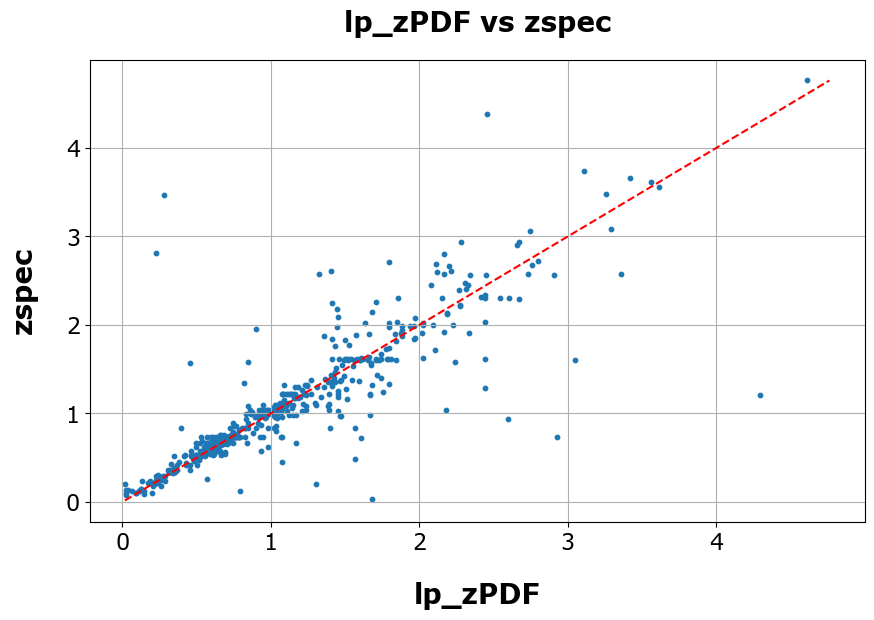

In [88]:
plt.figure(figsize=(10, 6))
x_values = np.linspace(
    min(
        redshift_edff_cdfs["lp_zPDF"].min(), 
        redshift_edff_cdfs["zspec"].min()
    ), 
    max(
        redshift_edff_cdfs["lp_zPDF"].max(), 
        redshift_edff_cdfs["zspec"].max()
    ), 
    100,
)

plt.plot(x_values, x_values, color='red', linestyle='--', label='x=y line')
plt.scatter(redshift_edff_cdfs["lp_zPDF"], redshift_edff_cdfs["zspec"], s=10)
plt.xlabel('lp_zPDF')
plt.ylabel('zspec')
plt.title('lp_zPDF vs zspec')
plt.grid(True)

plt.savefig('plots/h20_cdfs_redshifts.png')
plt.show()

### Plotting LR and Rel with respect to redshift

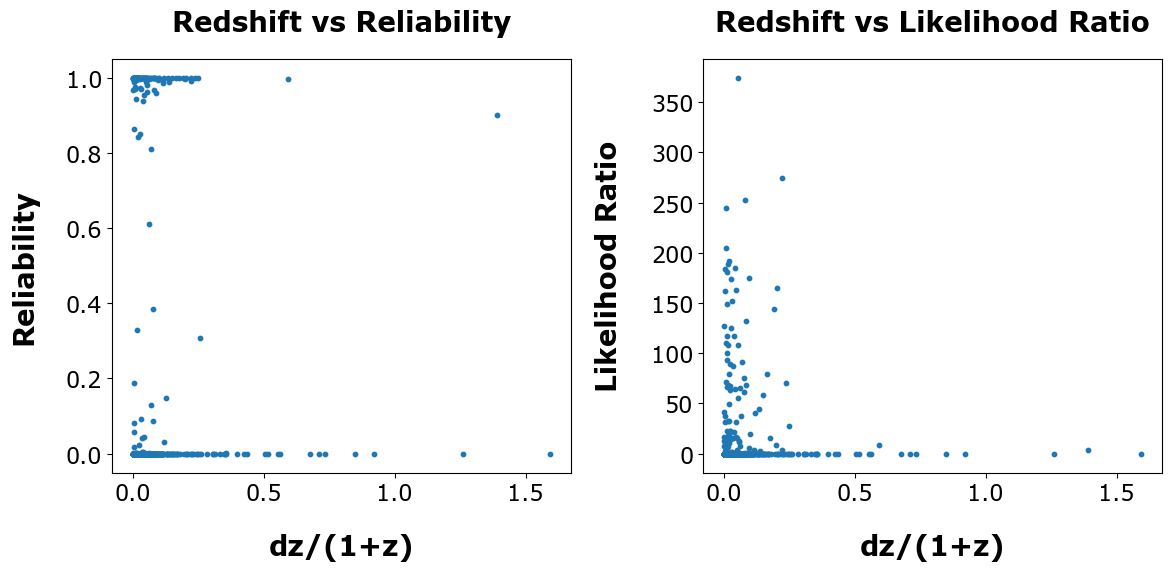

In [89]:
delta_redshift = abs(redshift_edff_cdfs["lp_zPDF"] - redshift_edff_cdfs["zspec"]) / (1 + redshift_edff_cdfs["zspec"])

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].scatter(delta_redshift, redshift_edff_cdfs['Rel'], s=10)
axs[0].set_xlabel('dz/(1+z)')
axs[0].set_ylabel('Reliability')
axs[0].set_title('Redshift vs Reliability')

axs[1].scatter(delta_redshift, redshift_edff_cdfs['LR'], s=10)
axs[1].set_xlabel('dz/(1+z)')
axs[1].set_ylabel('Likelihood Ratio')
axs[1].set_title('Redshift vs Likelihood Ratio')

plt.tight_layout()
plt.savefig('plots/redshift_reliability.png')
plt.show()

0.8619278053747373 0.8619278053747373


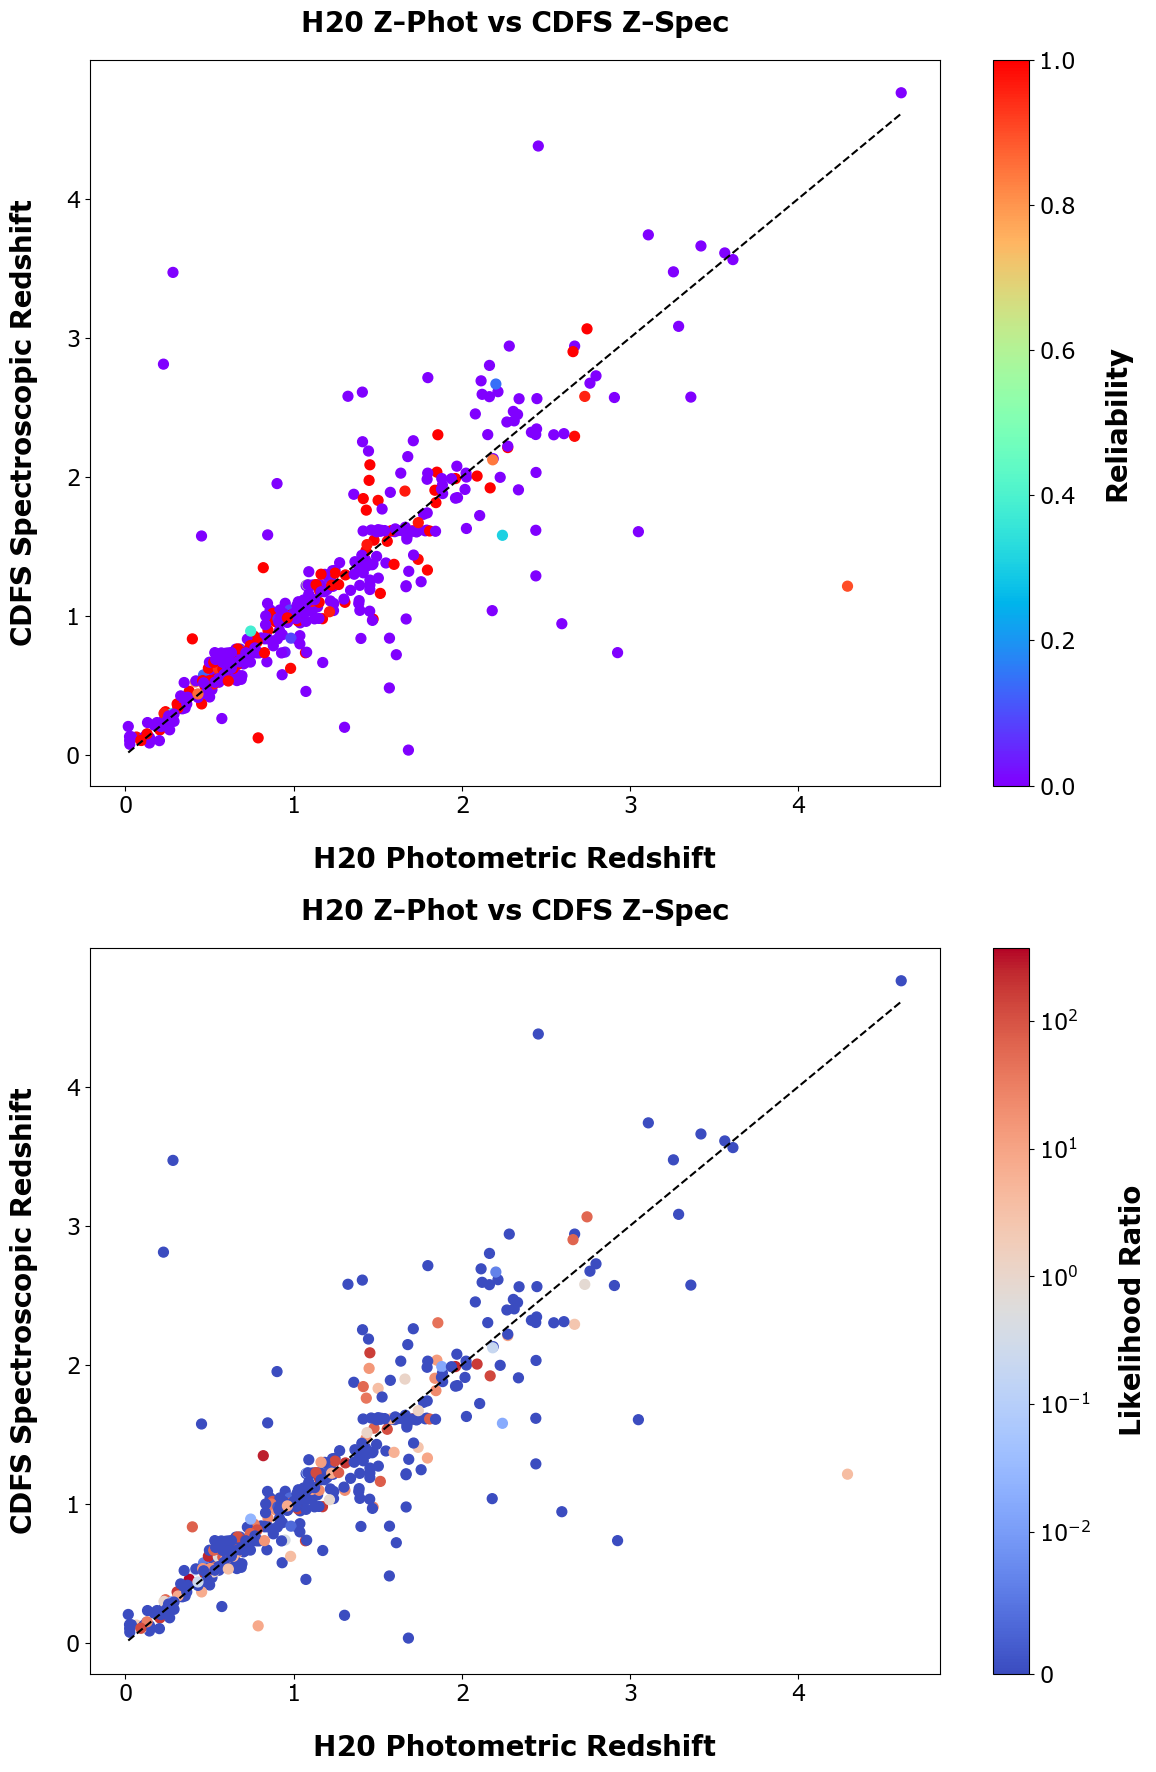

In [90]:


# Assuming redshift_edff_cdfs is already defined and contains the necessary data
lp_zPDF = redshift_edff_cdfs["lp_zPDF"]
zspec = redshift_edff_cdfs["zspec"]
LR = redshift_edff_cdfs["LR"]
Rel = redshift_edff_cdfs["Rel"]

# Compute the Pearson correlation coefficients
R1 = np.corrcoef(lp_zPDF, zspec)[0, 1]
R2 = np.corrcoef(lp_zPDF, zspec)[0, 1]

fig, axs = plt.subplots(2, 1, figsize=(12, 18))

scatter1 = axs[0].scatter(lp_zPDF, zspec, c=Rel, cmap='rainbow', s=50)
axs[0].set_xlabel('H20 Photometric Redshift')
axs[0].set_ylabel('CDFS Spectroscopic Redshift')
axs[0].set_title(f'H20 Z-Phot vs CDFS Z-Spec')
axs[0].plot([min(lp_zPDF), max(lp_zPDF)], [min(lp_zPDF), max(lp_zPDF)], color='black', linestyle='--')
cbar1 = fig.colorbar(scatter1, ax=axs[0])
cbar1.set_label('Reliability')

scatter2 = axs[1].scatter(lp_zPDF, zspec, c=LR, cmap='coolwarm', s=50, norm=SymLogNorm(0.01))
axs[1].set_xlabel('H20 Photometric Redshift')
axs[1].set_ylabel('CDFS Spectroscopic Redshift')
axs[1].set_title(f'H20 Z-Phot vs CDFS Z-Spec')
axs[1].plot([min(lp_zPDF), max(lp_zPDF)], [min(lp_zPDF), max(lp_zPDF)], color='black', linestyle='--')
cbar2 = fig.colorbar(scatter2, ax=axs[1])
cbar2.set_label('Likelihood Ratio')

print(R1, R2)

plt.tight_layout()

plt.savefig('plots/h20_cdfs_lyr_redshifts.png')
plt.show()